## About the Dataset
    The datasets consist of several medical predictor (independent) variables and one target (dependent) variable,
    Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age,
    and so on.

### Columns
    Pregnancies: Number of times pregnant
    Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure : Diastolic blood pressure (mm Hg)
    SkinThickness : Triceps skin fold thickness (mm)
    Insulin : 2-Hour serum insulin (mu U/ml)
    BMI : Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction : It provided some data on diabetes mellitus history in relatives and the genetic relationship
                               of those relatives to the patient.
    Age : Age (years)
    Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0
    
### Source: 
     Online medical Records stored in CSV file  

### Task - Data Cleaning and Preprocessing:
       
     Clean the data by handling missing values, duplicates, and outliers.
     Standardize data formats and units to ensure consistency.
     Perform data transformation, such as log scaling or normalization, for improved model performance.

# 1. Importing Libraries 

In [1]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

# 2. Loading DataSet

In [2]:
#Load the dataset
data = pd.read_csv("diabetes.csv")

# 3. Data Exploration 

In [3]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,1,81,74,41,57,46.3,1.096,32,0
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0


In [5]:
data.shape

(767, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
len(data)

767

In [8]:
data.ndim,data.size

(2, 6903)

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data["Outcome"].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

# TASK-1 COMPLETE 
  
    Dataset have no null values now
    Outliers and duplicate values are removed 
    data is in now perfect condition for EDA (Exploratory Data Analysis)  

# TASK -2 EXPLORATORY DATA ANALYSIS (EDA)

## Data Vizualization

Generate data visualizations, including histograms, scatter plots, and box plots, to reveal data distribution and patterns.
Create correlation matrices and heatmaps to identify relationships between variables.

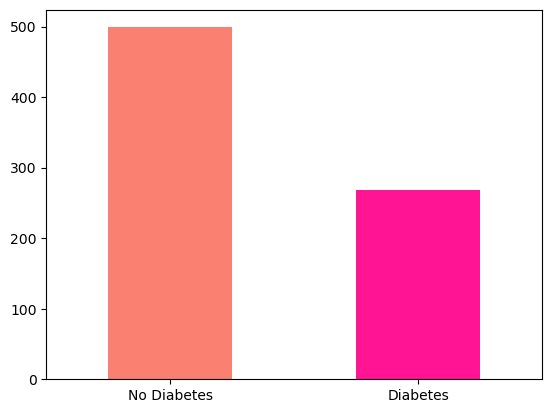

In [11]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


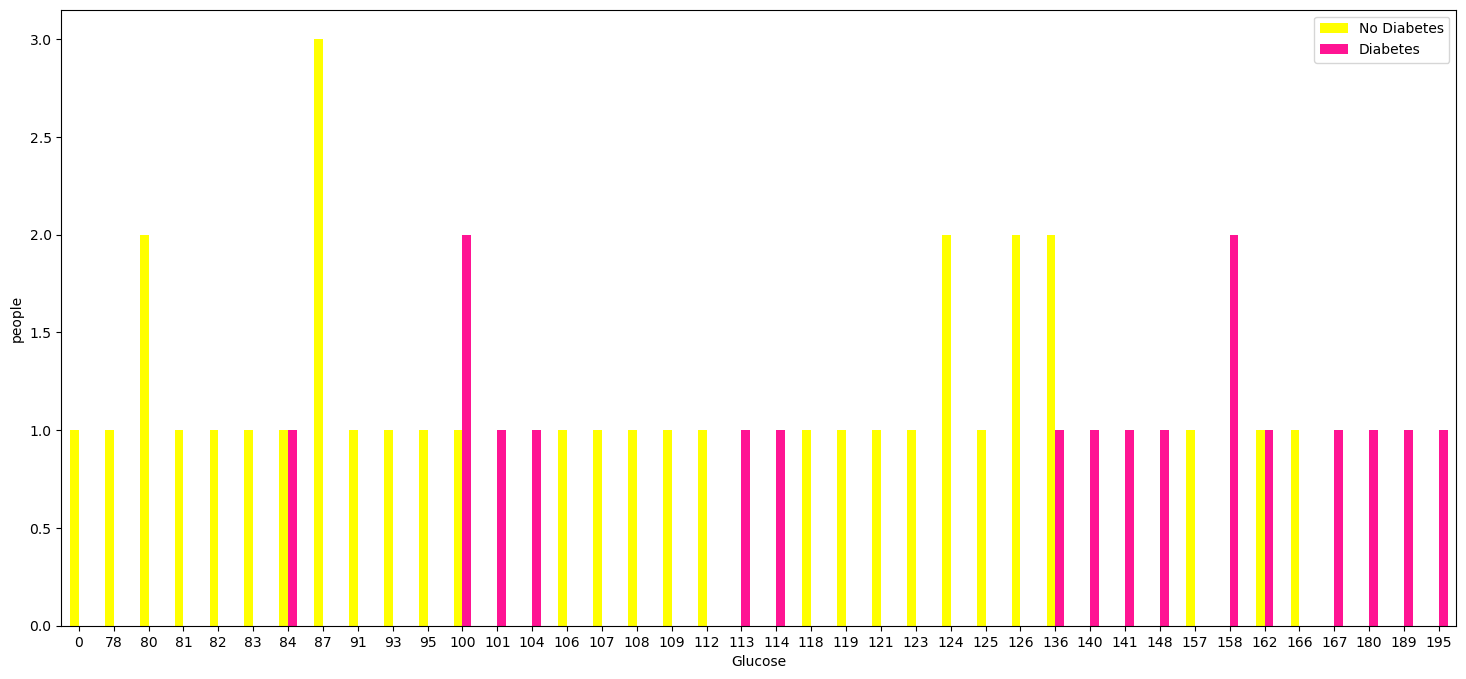

In [13]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

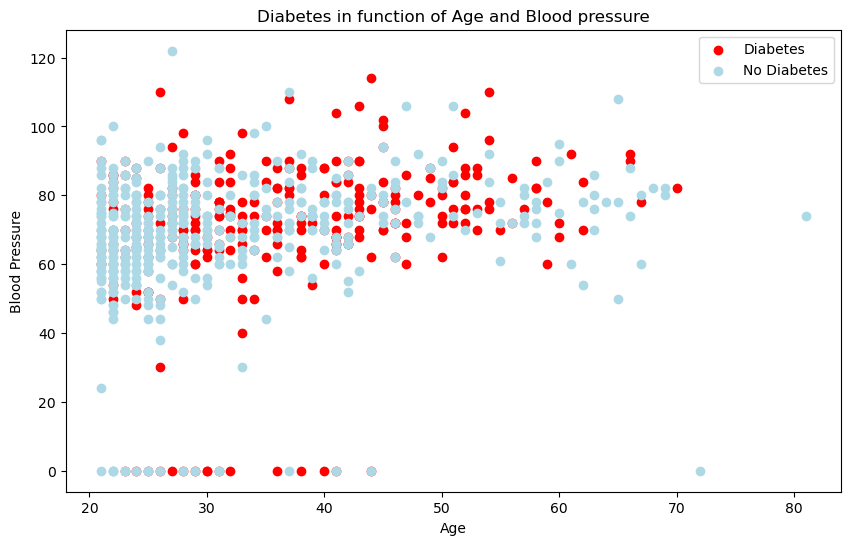

In [14]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

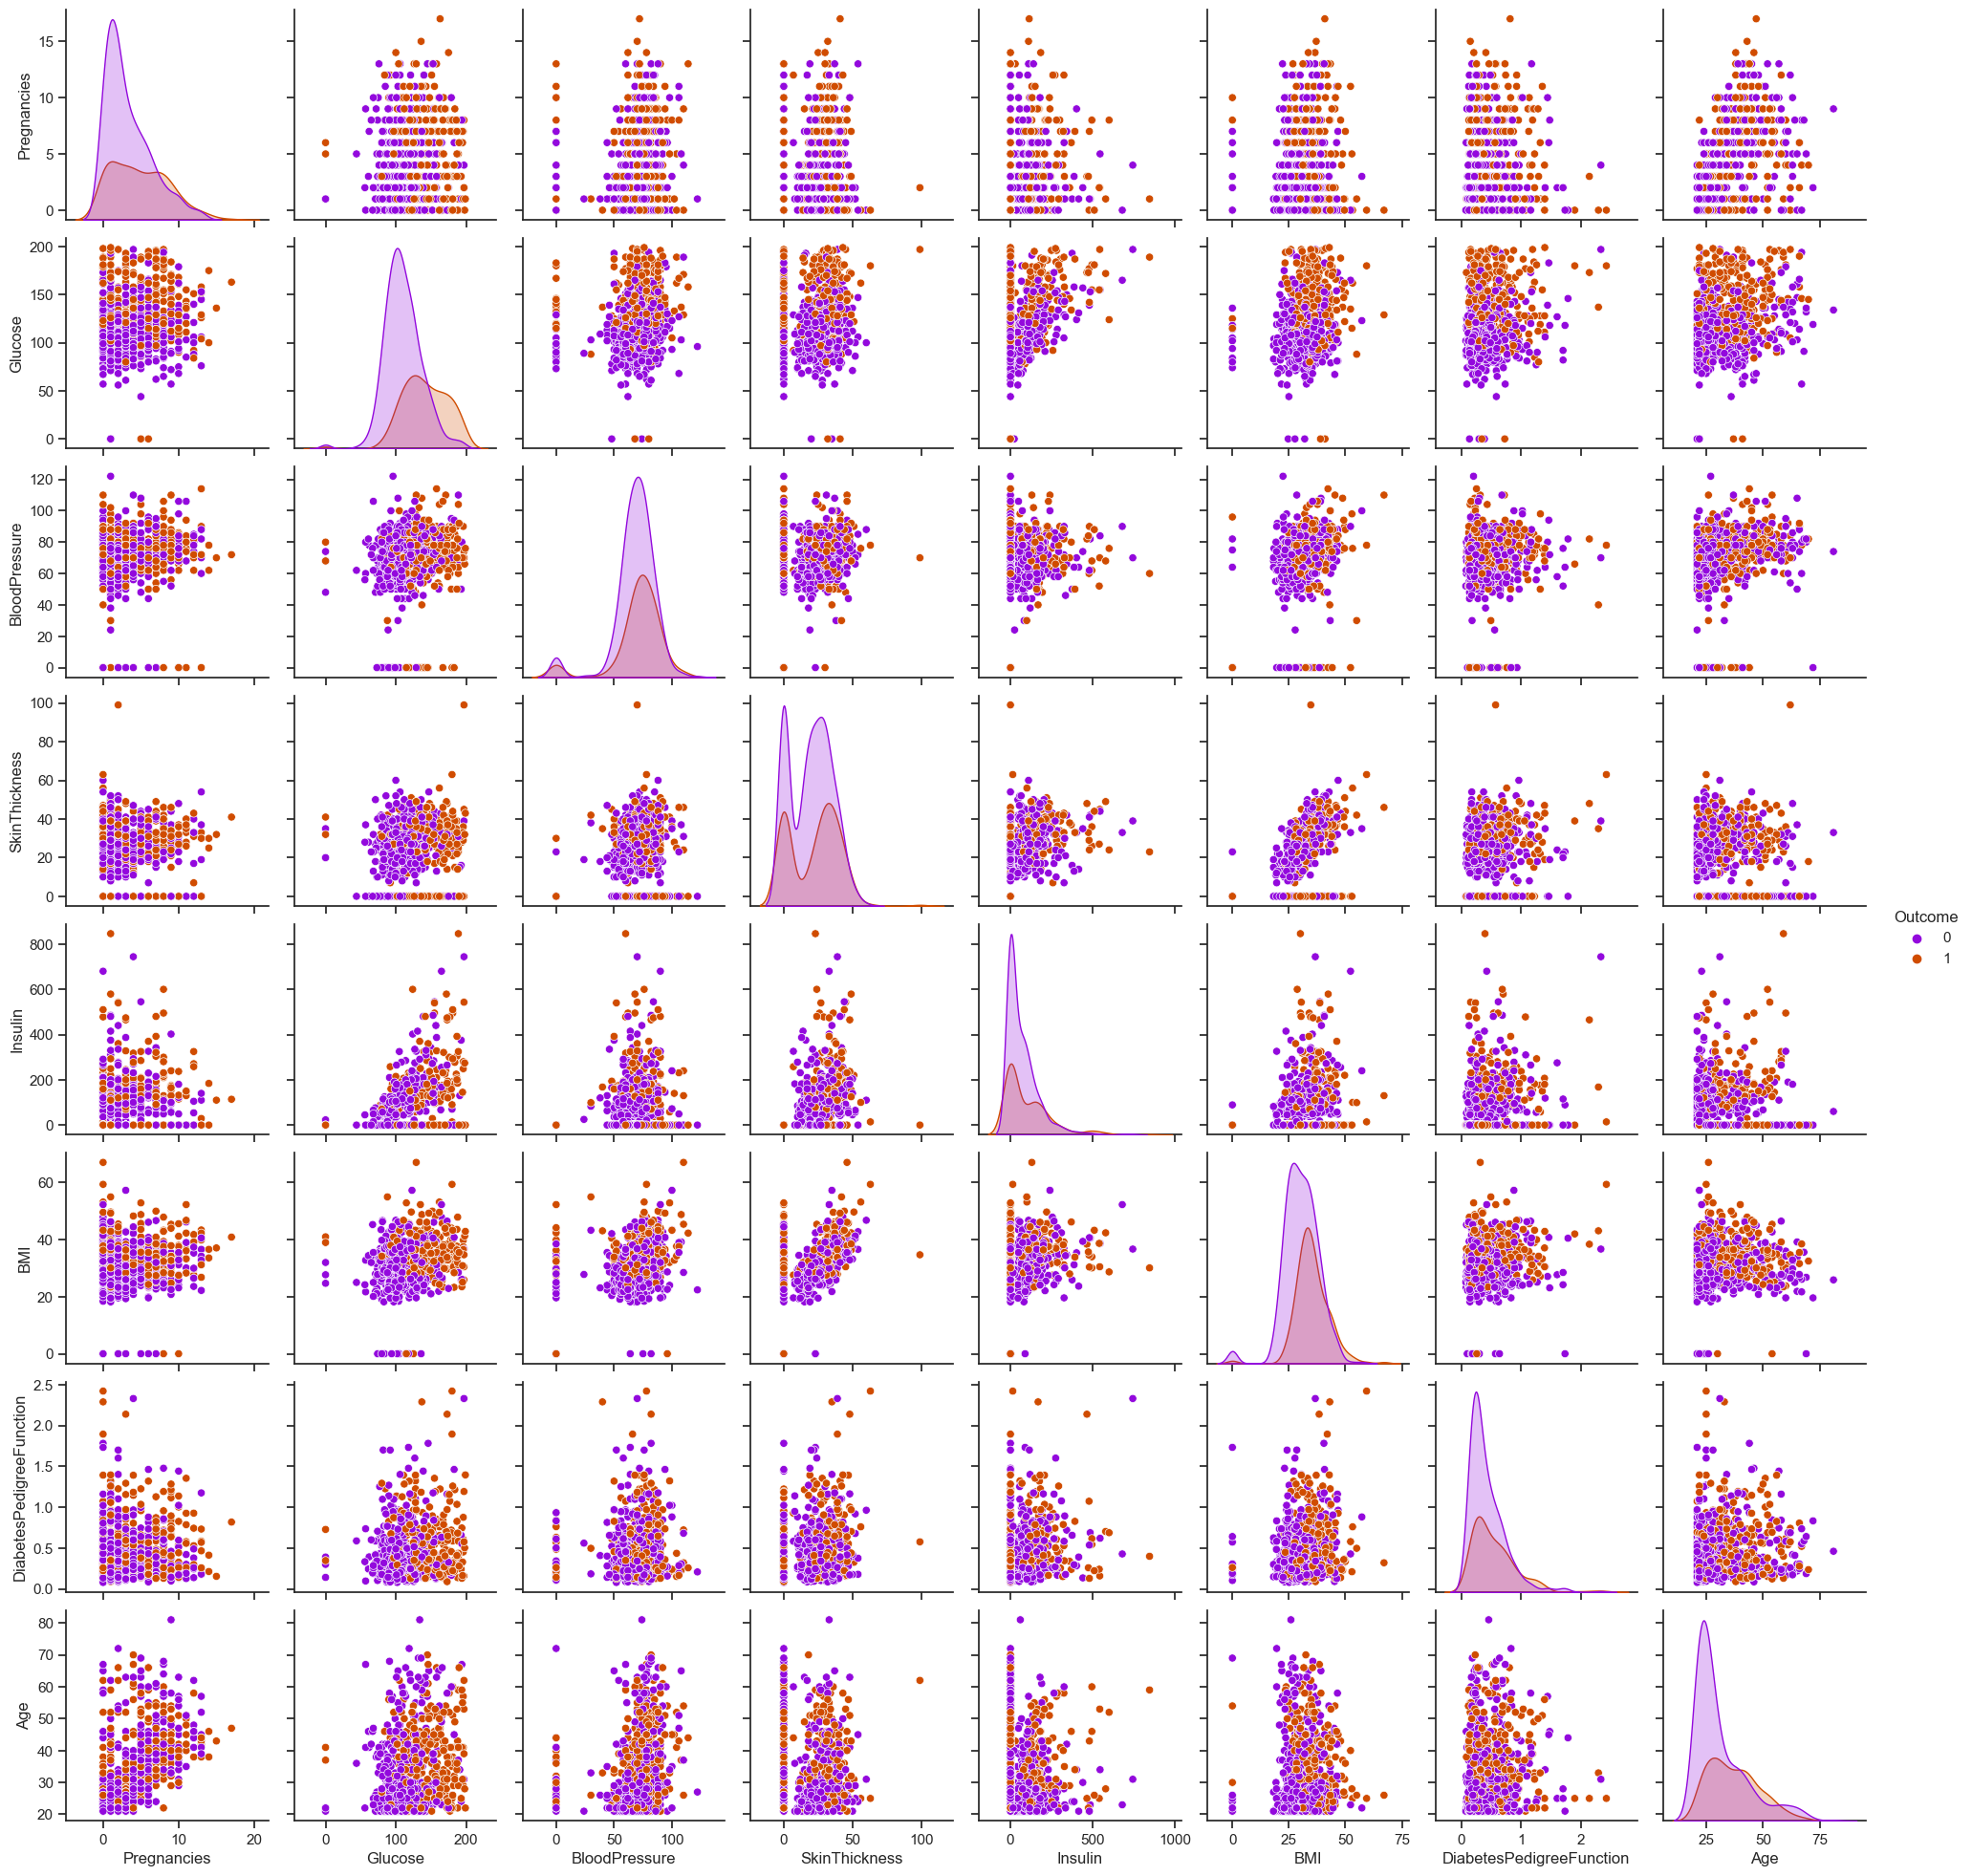

In [15]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

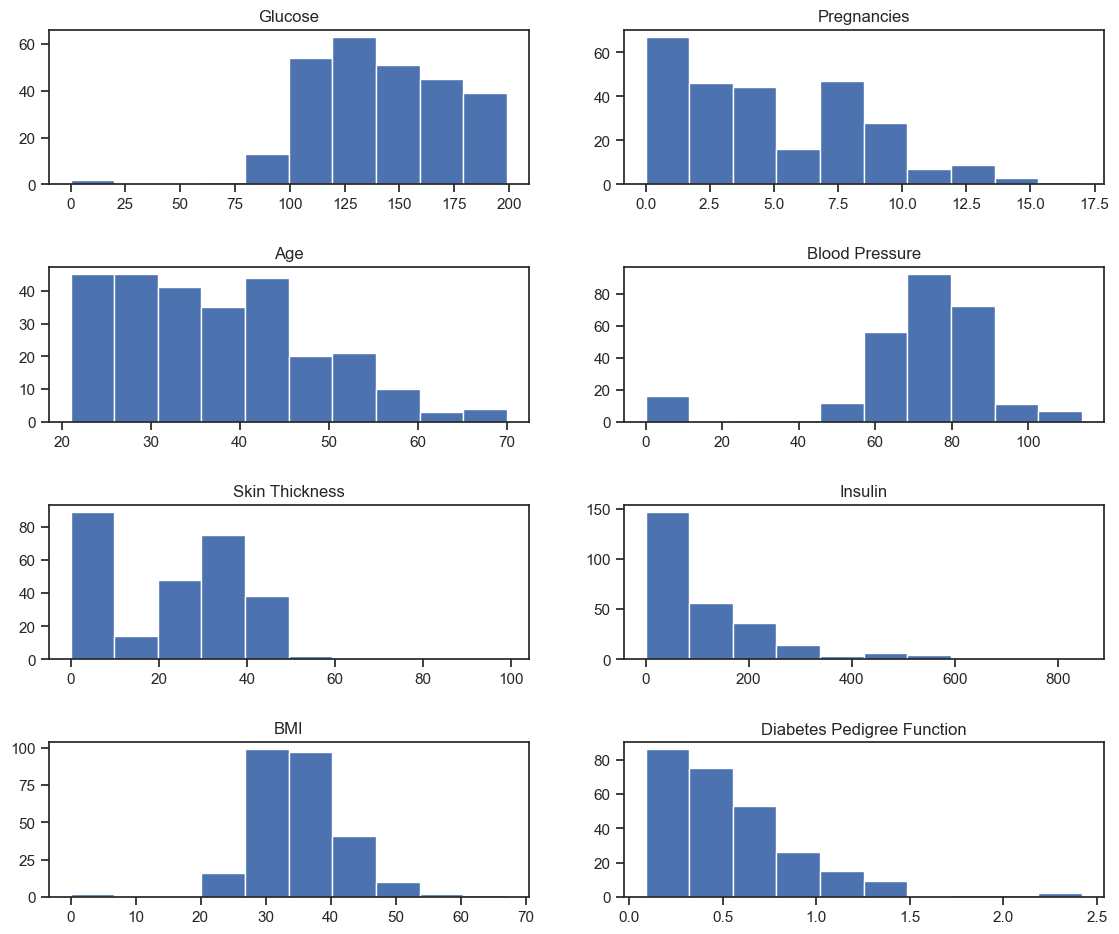

In [16]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

## Descriptive Statistics:

Calculate summary statistics, such as mean, median, and standard deviation, to describe data central tendencies and variability.
Explore data distributions and assess skewness and kurtosis.

In [17]:
#corelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128621,0.141399,-0.081009,-0.074356,0.017469,-0.034065,0.543904,0.221272
Glucose,0.128621,1.000000,0.152718,0.058120,0.330836,0.220957,0.136886,0.262783,0.466143
BloodPressure,0.141399,0.152718,1.000000,0.207390,0.089003,0.281825,0.041300,0.239699,0.065135
SkinThickness,-0.081009,0.058120,0.207390,1.000000,0.437635,0.392867,0.184412,-0.113312,0.075426
Insulin,-0.074356,0.330836,0.089003,0.437635,1.000000,0.197744,0.184728,-0.042985,0.129973
BMI,0.017469,0.220957,0.281825,0.392867,0.197744,1.000000,0.140546,0.036031,0.292612
DiabetesPedigreeFunction,-0.034065,0.136886,0.041300,0.184412,0.184728,0.140546,1.000000,0.033044,0.173478
Age,0.543904,0.262783,0.239699,-0.113312,-0.042985,0.036031,0.033044,1.000000,0.237725
Outcome,0.221272,0.466143,0.065135,0.075426,0.129973,0.292612,0.173478,0.237725,1.000000


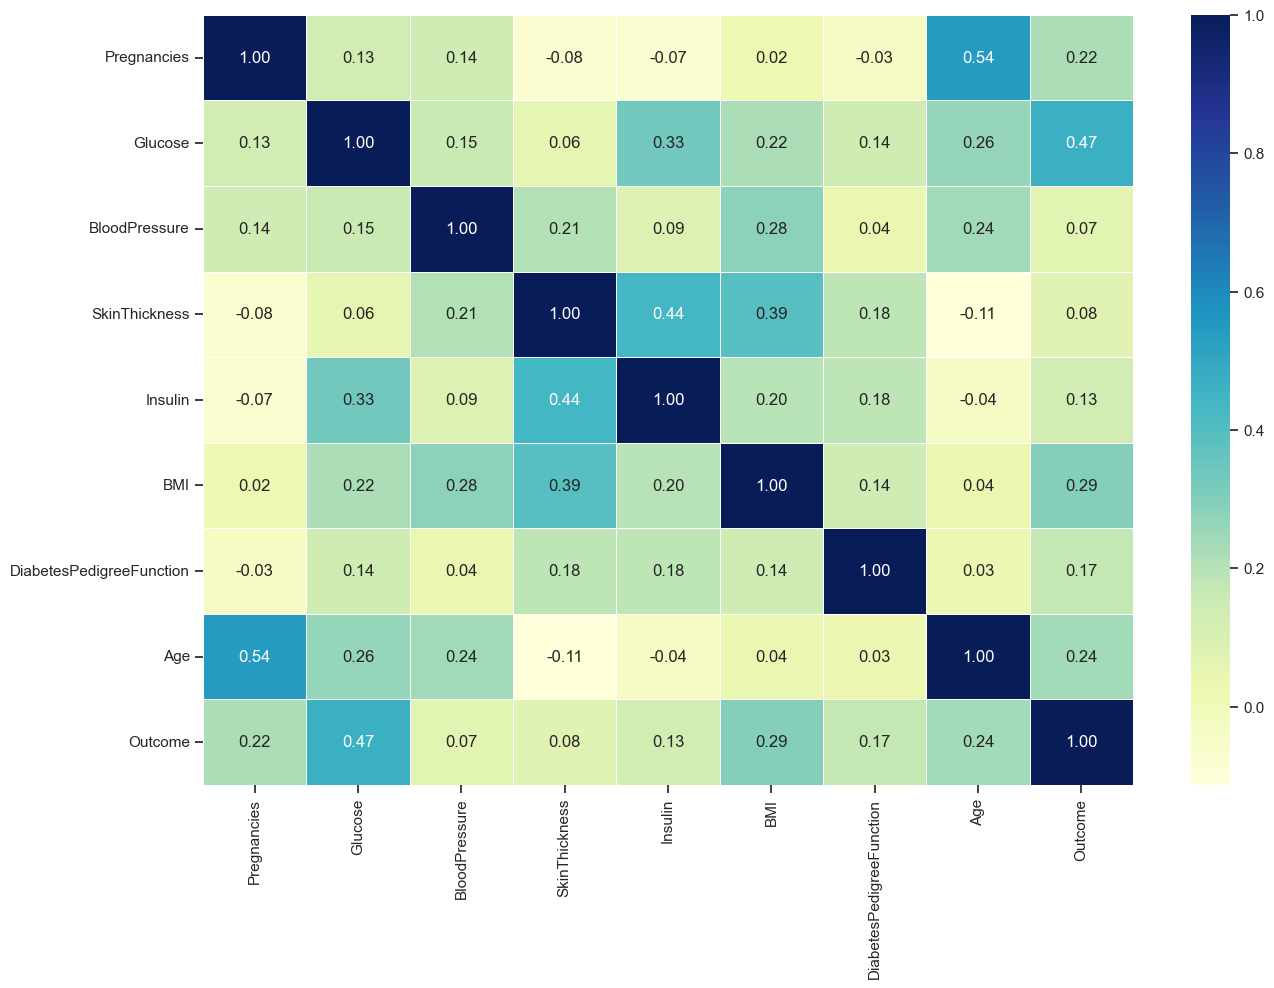

In [18]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [19]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate mean, median, and standard deviation
mean_value = np.mean(data)
median_value = np.median(data)
std_deviation = np.std(data)

# Calculate skewness and kurtosis
skewness = skew(data)
kurt = kurtosis(data)


# Print summary statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: Pregnancies                   3.848761
Glucose                     120.930900
BloodPressure                69.104302
SkinThickness                20.522816
Insulin                      79.903520
BMI                          31.994654
DiabetesPedigreeFunction      0.472081
Age                          33.254237
Outcome                       0.349413
dtype: float64
Median: 24.3
Standard Deviation: Pregnancies                   3.368010
Glucose                      31.956729
BloodPressure                19.355780
SkinThickness                15.947737
Insulin                     115.207929
BMI                           7.883950
DiabetesPedigreeFunction      0.331280
Age                          11.754409
Outcome                       0.476785
dtype: float64
Skewness: [ 0.89806466  0.17101261 -1.83863398  0.11137768  2.26618715 -0.42867799
  1.91403849  1.12578462  0.6316759 ]
Kurtosis: [ 0.14751779  0.62975839  5.12769556 -0.52480312  7.15056916  3.25421998
  5.53986412  0.62776547 

# Outlier Detection:

Identify and investigate potential outliers that may impact analysis or modeling.
Decide on appropriate strategies for handling outliers, such as removal or transformation.

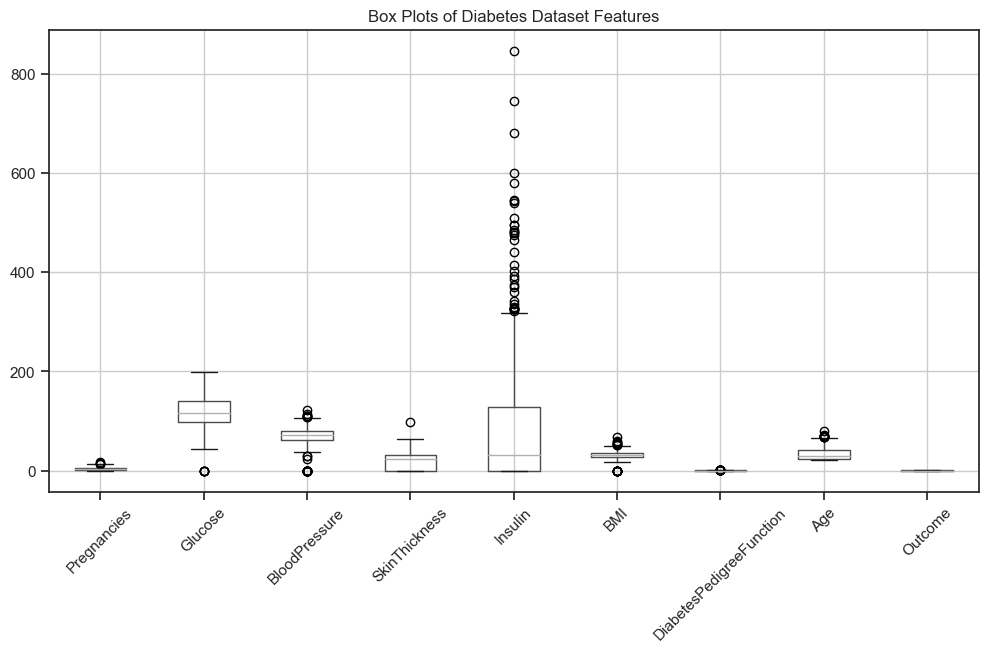

Indices of potential outliers:
Pregnancies: [  4   7   8   9  13  15  45  49  49  58  60  60  75  78  81  81  88 111
 123 145 153 159 172 177 182 186 193 220 222 228 228 247 261 266 269 286
 298 300 330 332 336 342 347 349 357 370 370 371 371 395 409 415 426 426
 430 435 445 445 453 453 455 459 468 484 486 494 494 502 522 522 533 535
 579 584 589 593 601 604 619 621 643 645 655 666 673 684 684 695 697 703
 706 706 753]
Glucose: [6 2 4 5 4 2 6 2 5 6 2 5 1 2 2 5 0 4 7 5 4 0 2 5 1 4 2 4 2 4 6 4 2 2 2 4 0
 2 6 2 2 1 2 1 2 4 6 5 6 6 4 4 2 5 2 2 5 6 2 7 0 7 2 2 4 2 5 1 2 5 2 2 3 4
 2 6 2 2 2 6 2 4 4 7 5 5 7 4 2 2 2 5 4]


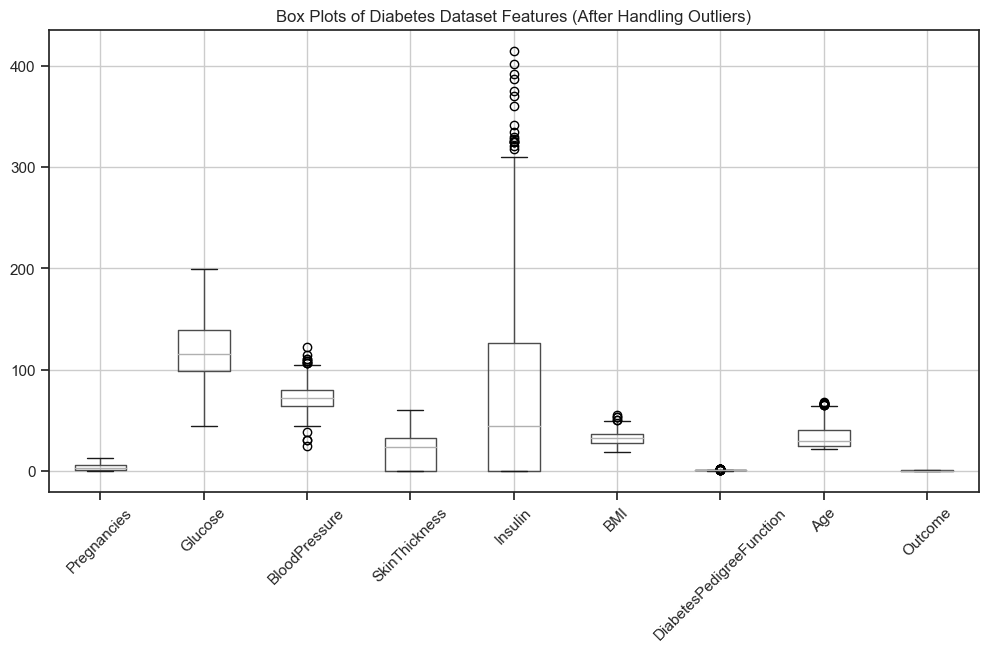

In [20]:

import matplotlib.pyplot as plt
from scipy import stats

# Load the diabetes dataset

column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]


# Visualize potential outliers using box plots
plt.figure(figsize=(12, 6))
data.boxplot(column=column_names)
plt.title("Box Plots of Diabetes Dataset Features")
plt.xticks(rotation=45)
plt.show()

# Identify potential outliers using the Z-score method
z_scores = np.abs(stats.zscore(data))
threshold = 3  # Adjust this threshold as needed
outlier_indices = np.where(z_scores > threshold)

# Print the indices of potential outliers
print("Indices of potential outliers:")
for feature, indices in zip(column_names, outlier_indices):
    print(f"{feature}: {indices}")

# Decide on appropriate strategies for handling outliers
# For example, you can remove the rows with outliers:
df_no_outliers = data[(z_scores <= threshold).all(axis=1)]

# Alternatively, you can transform the outliers, e.g., using a log transformation:
# df[column_names] = np.log1p(df[column_names])
# Recheck the dataset to ensure outliers have been properly handled

plt.figure(figsize=(12, 6))
df_no_outliers.boxplot(column=column_names)
plt.title("Box Plots of Diabetes Dataset Features (After Handling Outliers)")
plt.xticks(rotation=45)
plt.show()


# TASK-2 COMPLETE
    Data Visualization complete
    Descriptive Statistics analysis complete
    Outlier Detection done

# TASK-3 Feature Engineering

     1.Feature Selection:
     Evaluate the importance of features using techniques like feature importance scores or feature ranking.
     Remove irrelevant or redundant features to simplify models and reduce overfitting.
     
     2.Feature Creation:
     Engineer new features by combining existing variables or applying domain-specific knowledge.
     Create time-based features, text-based features, or interaction features to capture meaningful information.
     
     3.Data Transformation:
     Handle categorical variables through one-hot encoding, label encoding, or embedding.
     Normalize numerical features to ensure consistent scales for modeling.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [26]:
# Load the diabetes dataset

column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
# Split the data into features (X) and target (y)
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

In [28]:
# 1. Feature Selection: Evaluate feature importance
# Use RandomForestClassifier to calculate feature importance scores
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

In [29]:
# Print feature importance scores
print("Feature Importance Scores:")
print(feature_importance)

Feature Importance Scores:
Glucose                     0.266297
BMI                         0.169621
Age                         0.135016
DiabetesPedigreeFunction    0.120213
BloodPressure               0.089788
Pregnancies                 0.085255
Insulin                     0.068960
SkinThickness               0.064850
dtype: float64


In [30]:
# Select relevant features based on a threshold (e.g., keep top 5 features)
selected_features = feature_importance[:5].index
X_selected = X[selected_features]

In [31]:
# 2. Feature Creation: Create BMI category feature
# Define BMI category thresholds
bmi_categories = ["Underweight", "Normal", "Overweight", "Obese"]
bmi_thresholds = [0, 18.5, 24.9, 29.9, float("inf")]

In [32]:
# Create a new BMI category feature
X_selected["BMI_Category"] = pd.cut(X_selected["BMI"], bins=bmi_thresholds, labels=bmi_categories)

In [33]:
# 3. Data Transformation: Handle categorical variables (BMI_Category) using one-hot encoding
encoder = OneHotEncoder(sparse=False, drop="first")
X_encoded = encoder.fit_transform(X_selected[["BMI_Category"]])

In [34]:
# Concatenate the one-hot encoded features with the selected features
X_final = pd.concat([X_selected.drop(columns=["BMI_Category"]), pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(["BMI_Category"]))], axis=1)

In [35]:
# Print the final feature set
print("Final Feature Set:")
print(X_final.head(10))

Final Feature Set:
   Glucose   BMI  Age  DiabetesPedigreeFunction  BloodPressure  \
0      148  33.6   50                     0.627             72   
1       85  26.6   31                     0.351             66   
2      183  23.3   32                     0.672             64   
3       89  28.1   21                     0.167             66   
4      137  43.1   33                     2.288             40   
5      116  25.6   30                     0.201             74   
6       78  31.0   26                     0.248             50   
7      115  35.3   29                     0.134              0   
8      197  30.5   53                     0.158             70   
9      125   0.0   54                     0.232             96   

   BMI_Category_Obese  BMI_Category_Overweight  BMI_Category_Underweight  \
0                 1.0                      0.0                       0.0   
1                 0.0                      1.0                       0.0   
2                 0.0     

#### In this code, I first evaluate feature importance using a RandomForestClassifier, select the top 5 features, create a new feature "BMI_Category" based on BMI values, and handle categorical variables using one-hot encoding. This results in a final feature set X_final that I can use for modeling. Adjust the feature selection and transformation methods as needed for the specific analysis.

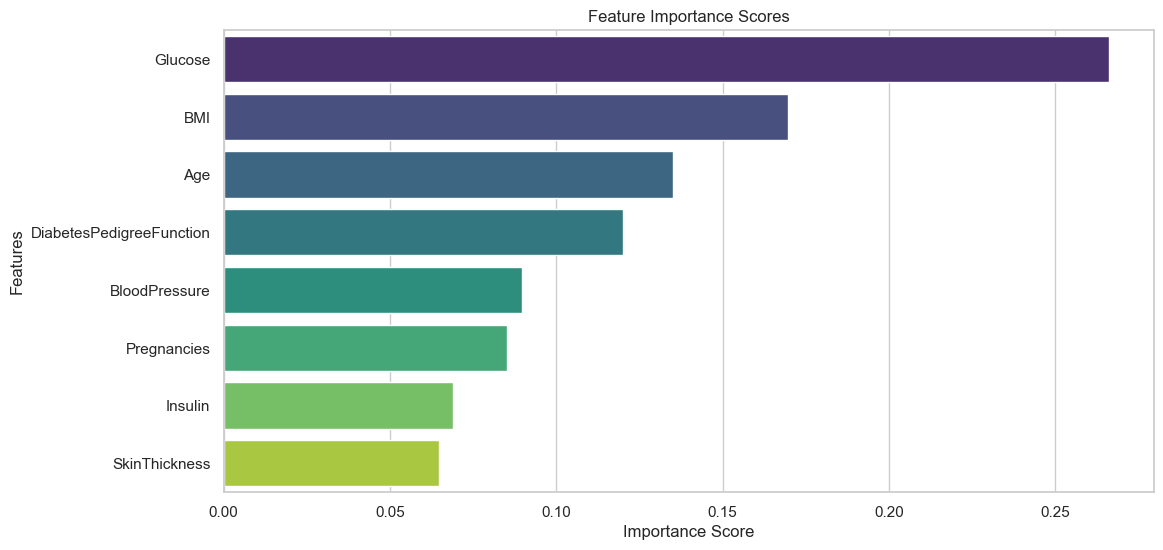

In [36]:
# Set style for Seaborn plots
sns.set(style="whitegrid")

# Visualize selected features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, orient="h", palette="viridis")
plt.title("Feature Importance Scores")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


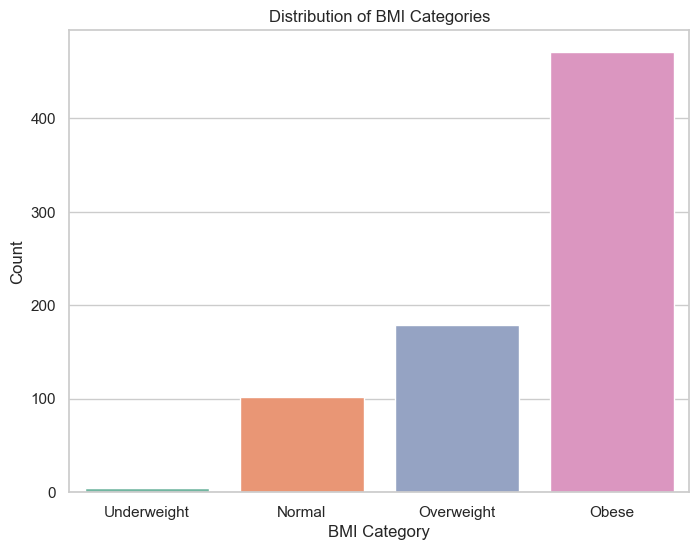

In [37]:
# Visualize the distribution of the "BMI_Category" feature
plt.figure(figsize=(8, 6))
sns.countplot(data=X_selected, x="BMI_Category", palette="Set2")
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

# TASK-3 COMPLETE
    Feature Selection: Done
    Feature Creation: Complete
    Data Transformation: Complete